## Problem Statement .
#### 1. To build a Multiple linear regression model for the prediction of demand for shared bikes.
#### 2. Understanding the key driver variables which should be accounted for understanding the Shared bike demands.

### Dataset characteristics:
- 1. instant: record index
- 2. dteday : date
- 3. season : season (1:spring, 2:summer, 3:fall, 4:winter)
- 4. yr : year (0: 2018, 1:2019)
- 5. mnth : month ( 1 to 12)
- 6. holiday : weather day is a holiday or not 
- 7. weekday : day of the week
- 8. workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- 9. weathersit : 
      - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
      - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
      - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered   clouds
      - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- 10. temp : temperature in Celsius
- 11. atemp: feeling temperature in Celsius
- 12. hum: humidity
- 13. windspeed: wind speed
- 14. casual: count of casual users
- 15. registered: count of registered users
- 16. cnt: count of total rental bikes including both casual and registered (Target variable)

## Step 1: Reading and Understanding the Data.


In [1]:
# Supress Warnings.

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
#Reading the day csv and storing in bikesharing dataframe.
bikesharing = pd.read_csv("day.csv")

In [4]:
#understanding top 5 row enteries.
bikesharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# Understanding the total enteries. 
bikesharing.shape

(730, 16)

In [6]:
#Understanding data entries and null count.
bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


- Findings : Null values are not found in any columns and so no need of missing value treatment.

In [7]:
# Understanding data distribution.
bikesharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


- No Anomolies seen from the data destribution ,but it can be better visulaised using scatter plot.
- season,mnth,weekday,weathersit should be treated as categorical data instead of numerical data.

In [8]:
# Converting season,mnth,weekday,weathersit  to categorical data.

bikesharing['season']=bikesharing['season'].astype('category')
bikesharing['mnth']=bikesharing['mnth'].astype('category')
bikesharing['weekday']=bikesharing['weekday'].astype('category')
bikesharing['weathersit']=bikesharing['weathersit'].astype('category')

In [9]:
bikesharing.describe()

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,0.500000,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,0.500343,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 2: Visualising the Data.
- Visualising data using Matplotlib and Seaborn.
- Scatter plot for numerical data.
- Box plot for categorical data.

In [10]:
import matplotlib.pyplot as plt 
import seaborn as sns

#### Plotting Numerical Data using Pairplot .

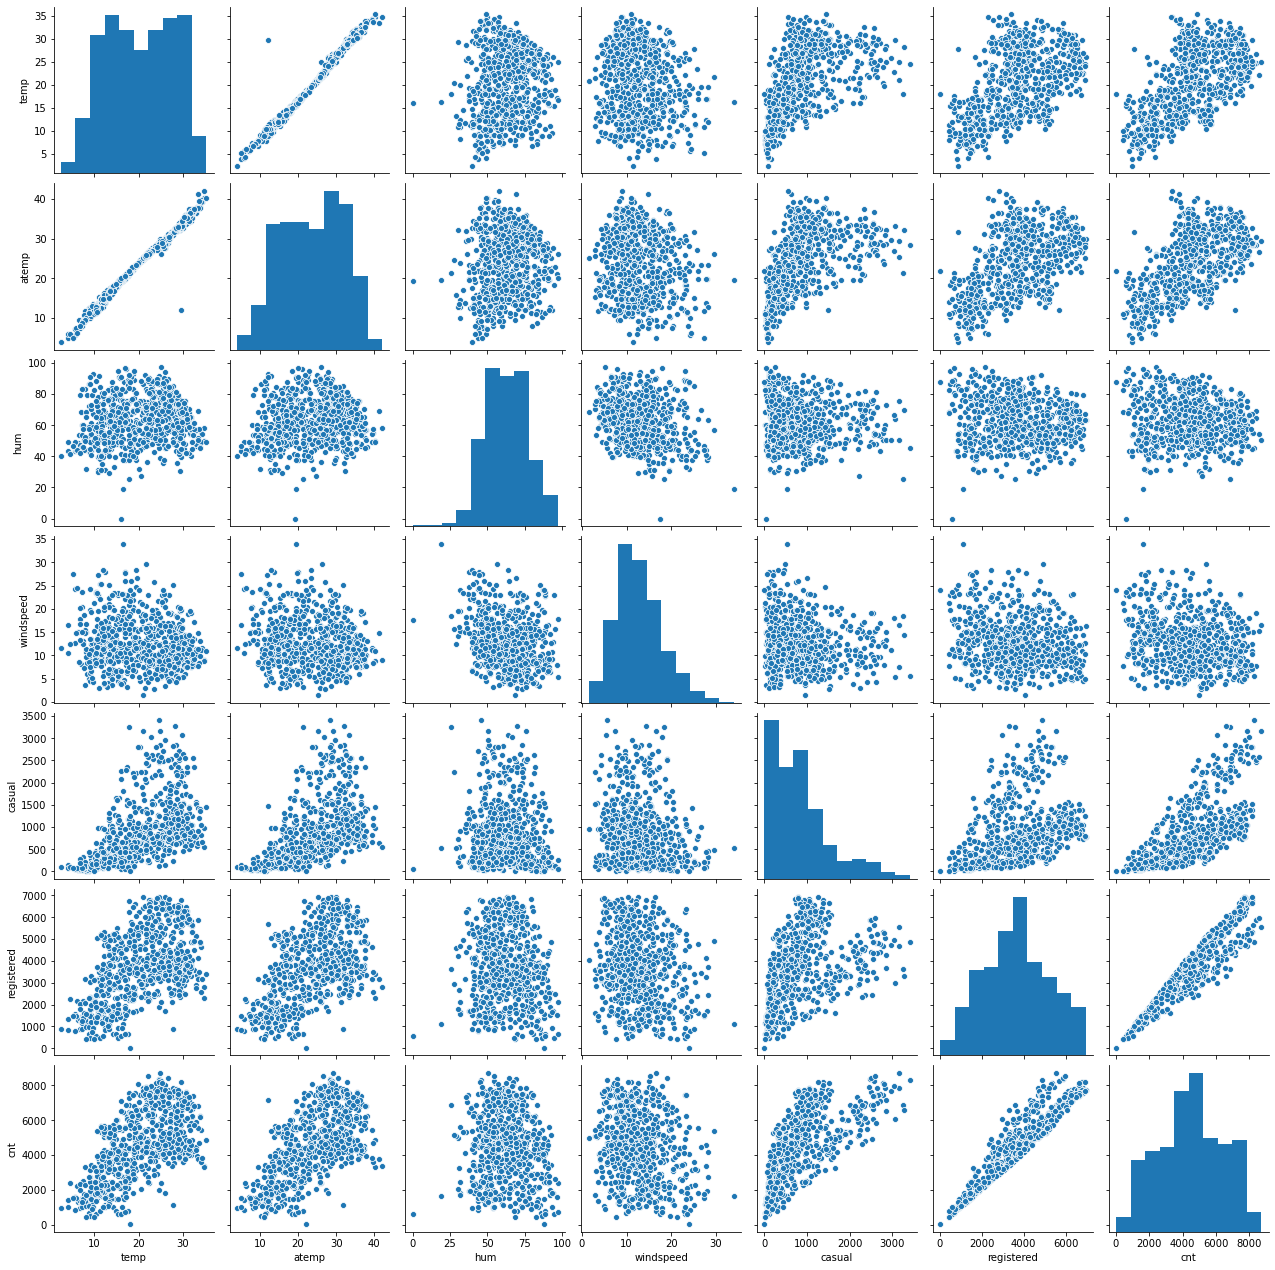

In [11]:
sns.pairplot(bikesharing[['temp','atemp','hum','windspeed','casual','registered','cnt']])
plt.show()

- Data distribution did not show any anomolies ,and target variable shows good correlation with temp variable.
- temp and atemp shows similar data distribution (Multicollinearity).

#### Plotting Boxplot for Categorical Data.


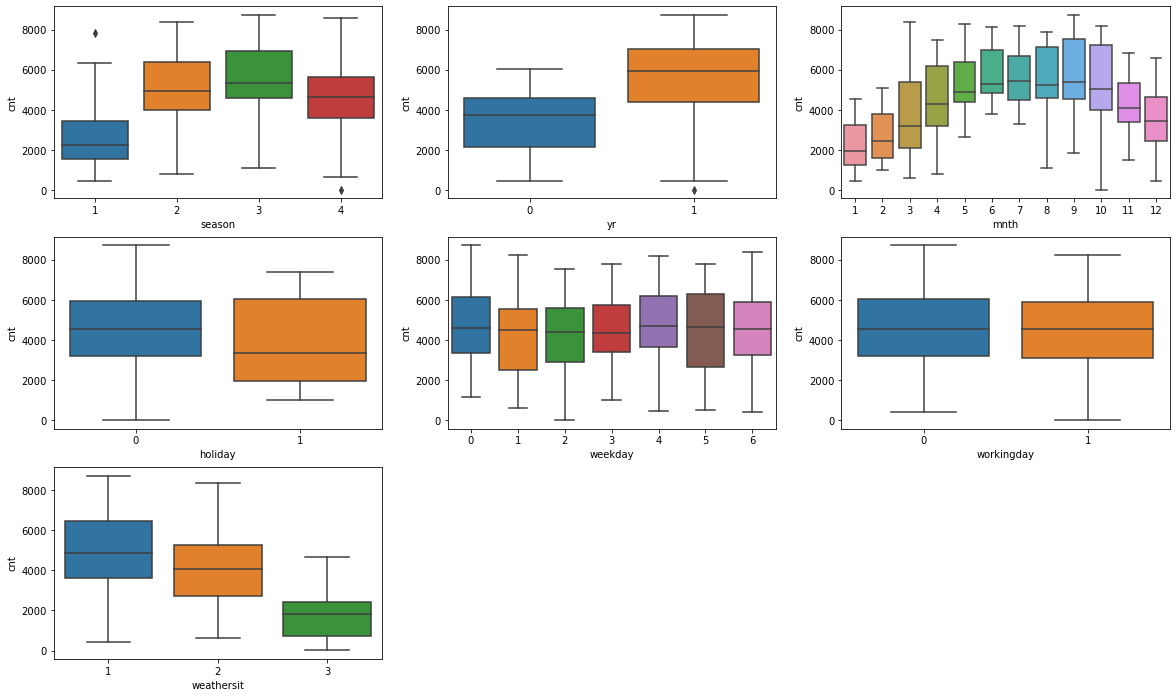

In [12]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikesharing)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bikesharing)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikesharing)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikesharing)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikesharing)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikesharing)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikesharing)
plt.show()

### Observation :
- 1. Fall and Summer has higer customer request and spring has the least, and similar information is captured in month data.
- 2. There is increase in bike sharing request from 2018 to 2019.
- 3. Non holidays have better demand .And, there is a drop in demand on day 2 of a week compared to other days.
- 4. There is more bike request during pleasant weather condition.

## Step 3 : Data preparation.
### Creating Dummy variables for categorical data.

#### Droping redundant columns :
- 1. instant column has unique values which are used as index,So they are redundant for analysis.
- 2. dteday column has date information which are already captured in yr ,mnth and weekday columns,So they are redundant for analysis.
- 3. casual and registered are two customer segments whose values are captured in total count cnt. Objective of this analysis is to find the attributes of total demand in shared bikes. So, this columns can be ignored for the analysis.

In [13]:
# Droping instant,dteday,casual, and registered .
bikesharing_new = bikesharing.copy(deep =True)
bikesharing_new.drop(columns=['instant','dteday','casual','registered'],inplace = True)


### Dummy variables
- 1. Creating Dummy entries for season,mnth,weekday, and weathersit columns

In [14]:
#Creating dummy entries.
bikesharing_new = pd.get_dummies(bikesharing_new, drop_first=True)
bikesharing_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

## Step 4: Splitting the Data into Training and Testing Sets.

- Splitting data into train set (70% data) and test set(30% data).

In [15]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
bikesharing_train, bikesharing_test = train_test_split(bikesharing_new, train_size = 0.7, test_size = 0.3, random_state = 100)

In [16]:
#Finding the shape of train Data set.
bikesharing_train.shape

(510, 30)

In [17]:
#Finding the shape of test Data set.
bikesharing_test.shape

(219, 30)

### Operation on train data.
###  Feature Rescaling :
- 1. Using MinMaxscaler temp,atemp,hum,windspeed and cnt data variables are scaled.

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [19]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

bikesharing_train[num_vars] = scaler.fit_transform(bikesharing_train[num_vars])

In [20]:
bikesharing_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.245098,0.262745,...,0.086275,0.084314,0.154902,0.152941,0.135294,0.143137,0.147059,0.129412,0.343137,0.029412
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.430568,0.440557,...,0.281045,0.278131,0.362166,0.360284,0.342373,0.350557,0.354512,0.335985,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


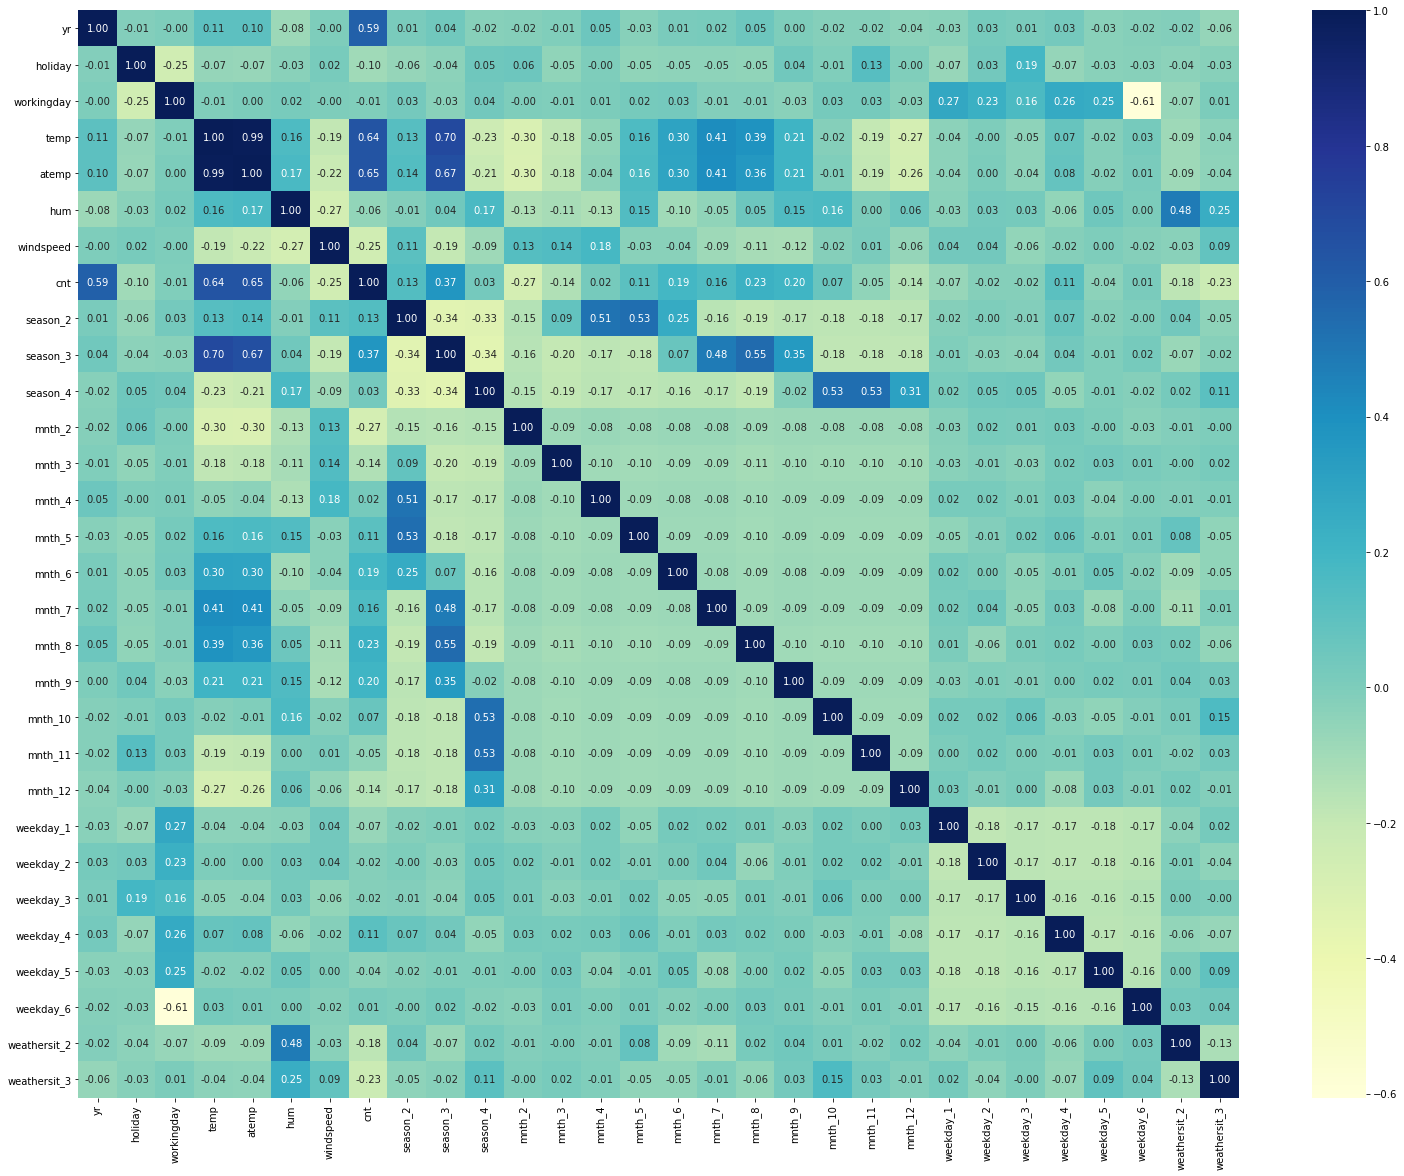

In [21]:
# Checking correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (26, 20))
sns.heatmap(bikesharing_train.corr(), annot = True, cmap="YlGnBu",fmt="0.2f")
plt.show()

In [22]:
#Understanding the correlation coeffecients .
for i in bikesharing_train.columns:
    print('cnt -',i,'\t',round(abs(bikesharing_train[['cnt',i]].corr().iloc[0,-1]),2))

cnt - yr 	 0.59
cnt - holiday 	 0.1
cnt - workingday 	 0.01
cnt - temp 	 0.64
cnt - atemp 	 0.65
cnt - hum 	 0.06
cnt - windspeed 	 0.25
cnt - cnt 	 1.0
cnt - season_2 	 0.13
cnt - season_3 	 0.37
cnt - season_4 	 0.03
cnt - mnth_2 	 0.27
cnt - mnth_3 	 0.14
cnt - mnth_4 	 0.02
cnt - mnth_5 	 0.11
cnt - mnth_6 	 0.19
cnt - mnth_7 	 0.16
cnt - mnth_8 	 0.23
cnt - mnth_9 	 0.2
cnt - mnth_10 	 0.07
cnt - mnth_11 	 0.05
cnt - mnth_12 	 0.14
cnt - weekday_1 	 0.07
cnt - weekday_2 	 0.02
cnt - weekday_3 	 0.02
cnt - weekday_4 	 0.11
cnt - weekday_5 	 0.04
cnt - weekday_6 	 0.01
cnt - weathersit_2 	 0.18
cnt - weathersit_3 	 0.23


#### Significant Observation :
- 1.yr ,temp and atemp have significantly higher correlation with cnt variable.
- 2.month 2,8 and 9,season 3 and weathersit have also significantly good correlation with cnt variable.

## Step 5: Building a linear model.

- 1. Using Recursive Feature Elimination (RFE) to find top 15 (50% data columns) important variables that can be used for further manual feature elimination.

In [23]:
# Importing RFE and LinearRegression.
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [24]:
# Dividing into X and Y sets for the model building.
y_train = bikesharing_train.pop('cnt')
X_train = bikesharing_train

In [25]:
# Running the linear regression model.
lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE.
rfe = RFE(lm, 15)             
rfe = rfe.fit(X_train, y_train)

In [26]:
#Checking the rank of features.
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 11),
 ('mnth_3', True, 1),
 ('mnth_4', False, 2),
 ('mnth_5', True, 1),
 ('mnth_6', False, 3),
 ('mnth_7', False, 12),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 13),
 ('mnth_12', False, 14),
 ('weekday_1', False, 9),
 ('weekday_2', False, 10),
 ('weekday_3', False, 8),
 ('weekday_4', False, 6),
 ('weekday_5', False, 7),
 ('weekday_6', False, 15),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [27]:
#Top 15 featues.
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_2', 'season_3',
       'season_4', 'mnth_3', 'mnth_5', 'mnth_8', 'mnth_9', 'mnth_10',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [28]:
#Other featues.
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'mnth_2', 'mnth_4', 'mnth_6', 'mnth_7',
       'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6'],
      dtype='object')

### Model 1 :
- Using statsmodel and building regression model with the 15 independent selected variables.


In [29]:
# Creating X_test dataframe with RFE selected variables.
X_train_rfe = X_train[col]

In [30]:
# Adding a constant variable .
import statsmodels.api as sm  
X_train_new = sm.add_constant(X_train_rfe)

In [31]:
# Running the linear regression model.
lm = sm.OLS(y_train,X_train_new).fit()   

In [32]:
#Summary of the linear model.
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.3
Date:                Sun, 07 Mar 2021   Prob (F-statistic):          2.95e-189
Time:                        16:27:12   Log-Likelihood:                 514.85
No. Observations:                 510   AIC:                            -997.7
Df Residuals:                     494   BIC:                            -929.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2376      0.027      8.689   

In [33]:
# Calculating the VIFs of the model.
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,24.64
3,hum,15.55
6,season_3,8.80
4,windspeed,3.80
5,season_2,3.73
7,season_4,3.13
13,weathersit_2,2.15
0,yr,2.04
10,mnth_8,1.85
9,mnth_5,1.68


#### Procedure Followed for feature elimination .
- Prio 1 : Removing Features with high p value and high VIF first. (P-value >0.05 ,VIF >5).
- Prio 2 : Removing Features with high p value and low VIF. (P-value >0.05 ,VIF <= 5).
- Prio 3 : Removing Features with low p value and high VIF. (P-value <=0.05 ,VIF > 5).
- Prio 3 : Retaining Features with low p value and low VIF. (P-value <=0.05 , VIF <= 5).

#### Removing Feature season_3 which as higher P value (0.058) and VIF (8.80)

### Model 2 
- Droping season_3 from existing model and rerunning the model.

In [34]:
# Droping season_3.
X_train_rfe = X_train_rfe.drop(["season_3"], axis = 1)

# Adding a constant variable.  
X_train_lm = sm.add_constant(X_train_rfe)

# Running the linear model.
lm = sm.OLS(y_train,X_train_lm).fit()   

In [35]:
#Summary of the linear model.
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.9
Date:                Sun, 07 Mar 2021   Prob (F-statistic):          1.25e-189
Time:                        16:27:12   Log-Likelihood:                 513.00
No. Observations:                 510   AIC:                            -996.0
Df Residuals:                     495   BIC:                            -932.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2369      0.027      8.643   

In [36]:
# Calculating the VIFs of the model.
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,14.88
2,temp,10.03
4,windspeed,3.75
6,season_4,2.35
5,season_2,2.31
12,weathersit_2,2.14
0,yr,2.02
8,mnth_5,1.63
9,mnth_8,1.62
11,mnth_10,1.61


#### Removing Feature mnth_5 which as higher P value (0.162).

### Model 3 
- Droping mnth_5 from existing model and rerunning the model.

In [37]:
# Droping mnth_5.
X_train_rfe = X_train_rfe.drop(["mnth_5"], axis = 1)

# Adding a constant variable.  
X_train_lm = sm.add_constant(X_train_rfe)

# Running the linear model.
lm = sm.OLS(y_train,X_train_lm).fit() 

In [38]:
#Summary of the linear model.
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     206.1
Date:                Sun, 07 Mar 2021   Prob (F-statistic):          2.26e-190
Time:                        16:27:12   Log-Likelihood:                 511.99
No. Observations:                 510   AIC:                            -996.0
Df Residuals:                     496   BIC:                            -936.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2324      0.027      8.529   

In [39]:
# Calculating the VIFs of the model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,14.75
2,temp,10.01
4,windspeed,3.69
6,season_4,2.34
11,weathersit_2,2.14
0,yr,2.02
5,season_2,1.83
8,mnth_8,1.61
10,mnth_10,1.61
9,mnth_9,1.34


#### Removing Feature mnth_3 which as higher P value (0.093).

### Model 4
- Droping mnth_3 from existing model and rerunning the model.

In [40]:
# Droping mnth_3.
X_train_rfe = X_train_rfe.drop(["mnth_3"], axis = 1)

# Adding a constant variable . 
X_train_lm = sm.add_constant(X_train_rfe)

# Running the linear model.
lm = sm.OLS(y_train,X_train_lm).fit() 

In [41]:
#Summary of the linear model.
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     222.3
Date:                Sun, 07 Mar 2021   Prob (F-statistic):          6.02e-191
Time:                        16:27:12   Log-Likelihood:                 510.54
No. Observations:                 510   AIC:                            -995.1
Df Residuals:                     497   BIC:                            -940.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2390      0.027      8.848   

In [42]:
# Calculating the VIFs of the model.
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,14.41
2,temp,9.88
4,windspeed,3.59
6,season_4,2.27
10,weathersit_2,2.13
0,yr,2.02
5,season_2,1.83
9,mnth_10,1.61
7,mnth_8,1.60
8,mnth_9,1.34


#### Removing Feature hum which as higher VIF value (14.41).

### Model 5
- Droping hum from existing model and rerunning the model.

In [43]:
# Droping hum.
X_train_rfe = X_train_rfe.drop(["hum"], axis = 1)

# Adding a constant variable. 
X_train_lm = sm.add_constant(X_train_rfe)

# Running the linear model.
lm = sm.OLS(y_train,X_train_lm).fit() 

In [44]:
#Summary of the linear model.
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.1
Date:                Sun, 07 Mar 2021   Prob (F-statistic):          3.21e-187
Time:                        16:27:12   Log-Likelihood:                 498.87
No. Observations:                 510   AIC:                            -973.7
Df Residuals:                     498   BIC:                            -922.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1355      0.017      8.079   

In [45]:
# Calculating the VIFs of the model.
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.11
3,windspeed,3.11
0,yr,2.00
5,season_4,1.95
4,season_2,1.82
8,mnth_10,1.60
6,mnth_8,1.59
9,weathersit_2,1.49
7,mnth_9,1.34
10,weathersit_3,1.09


#### Removing Feature mnth_10 which as higher P value (0.054).

### Model 6
- Droping mnth_10 from existing model and rerunning the model.

In [46]:
# Droping mnth_10.
X_train_rfe = X_train_rfe.drop(["mnth_10"], axis = 1)

# Adding a constant variable. 
X_train_lm = sm.add_constant(X_train_rfe)

# Running the linear model.
lm = sm.OLS(y_train,X_train_lm).fit() 

In [47]:
#Summary of the linear model.
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     251.3
Date:                Sun, 07 Mar 2021   Prob (F-statistic):          1.26e-187
Time:                        16:27:12   Log-Likelihood:                 496.97
No. Observations:                 510   AIC:                            -971.9
Df Residuals:                     499   BIC:                            -925.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1312      0.017      7.871   

In [48]:
# Calculating the VIFs of the model.
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.01
3,windspeed,3.10
0,yr,2.00
4,season_2,1.81
6,mnth_8,1.58
5,season_4,1.49
8,weathersit_2,1.48
7,mnth_9,1.31
9,weathersit_3,1.08
1,holiday,1.04


#### Removing Feature mnth_8 which as higher P value (0.001).

### Model 7
- Droping mnth_8 from existing model and rerunning the model.

In [49]:
# Droping mnth_8.
X_train_rfe = X_train_rfe.drop(["mnth_8"], axis = 1)

# Adding a constant variable .
X_train_lm = sm.add_constant(X_train_rfe)

# Running the linear model.
lm = sm.OLS(y_train,X_train_lm).fit() 

In [50]:
#Summary of the linear model.
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     272.9
Date:                Sun, 07 Mar 2021   Prob (F-statistic):          1.37e-186
Time:                        16:27:12   Log-Likelihood:                 491.62
No. Observations:                 510   AIC:                            -963.2
Df Residuals:                     500   BIC:                            -920.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1264      0.017      7.541   

In [51]:
# Calculating the VIFs of the model.
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.68
3,windspeed,3.05
0,yr,2.00
4,season_2,1.56
7,weathersit_2,1.48
5,season_4,1.38
6,mnth_9,1.20
8,weathersit_3,1.08
1,holiday,1.03


#### Model 7 looks to be a good model for the estimate. 
   - It as comparitivley higher R-Squared(0.831) and adjusted R-Squared(0.828) values .
   - All the Estimation coeffecients (Beta values) are significant(p value is 0) and have              comparitivley lower multicollinearity (low VIF value)
   - Overal model as a higher F-statistic value.

### Residual Analysis of the train data.

- Checking whether error term is normal distribution (Assumption of linear regression).

In [52]:
#Predicting the target value using model 7. 
y_train_pred = lm.predict(X_train_lm)

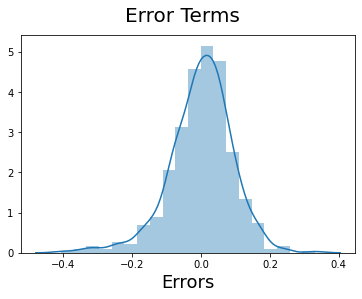

In [53]:
# Plot the histogram of the error terms.
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18) 
plt.show()

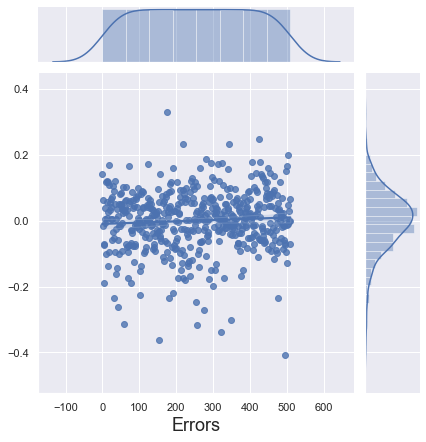

In [54]:
# To check the distribution of error term.
sns.set(color_codes =True)
sns.jointplot(x=np.arange(510),y =(y_train - y_train_pred),kind='reg')                  
plt.xlabel('Errors', fontsize = 18) 
plt.show()

- Error terms are normaly distributed (centered around 0) and are independent, thus the model is a good fit for train data set .

### Predicting and Evaluating the model on test data set. 

In [55]:
# Scaling the 'temp', 'atemp', 'hum', 'windspeed', 'cnt' variables.
bikesharing_test[num_vars] = scaler.transform(bikesharing_test[num_vars])

In [56]:
# Selecting only the significant columns for prediction :
bikesharing_test_new = bikesharing_test[col]
bikesharing_test_new['cnt'] = bikesharing_test['cnt']

In [57]:
# Droping columns mnth_8,mnth_10,hum,mnth_3,mnth_5,season_3.
bikesharing_test_new = bikesharing_test_new.drop(columns=['mnth_8','mnth_10','hum','mnth_3','mnth_5','season_3'])

In [58]:
bikesharing_test_new.describe()

,yr,holiday,temp,windspeed,season_2,season_4,mnth_9,weathersit_2,weathersit_3,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.558941,0.313350,0.264840,0.232877,0.086758,0.319635,0.027397,0.520592
std,0.500722,0.188034,0.233698,0.159947,0.442259,0.423633,0.282125,0.467403,0.163612,0.218435
min,0.000000,0.000000,0.046591,-0.042808,0.000000,0.000000,0.000000,0.000000,0.000000,0.048205
25%,0.000000,0.000000,0.354650,0.198517,0.000000,0.000000,0.000000,0.000000,0.000000,0.377531
50%,0.000000,0.000000,0.558691,0.299459,0.000000,0.000000,0.000000,0.000000,0.000000,0.524275
75%,1.000000,0.000000,0.759096,0.403048,1.000000,0.000000,0.000000,1.000000,0.000000,0.672745
max,1.000000,1.000000,0.984424,0.807474,1.000000,1.000000,1.000000,1.000000,1.000000,0.963300


In [59]:
# Dividing into X_test and y_test.
y_test = bikesharing_test_new.pop('cnt')
X_test = bikesharing_test_new

In [60]:
# Adding a constant variable. 
X_test_new = sm.add_constant(X_test)

In [61]:
# Making predictions.
y_test_pred = lm.predict(X_test_new)

In [62]:
# Checking the R-squared on the test set.
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)
r_squared

0.7938290016640651

In [63]:
# Adjusted R-squared 
# n is number of rows in X_test
n = X_test.shape[0]

# Number of features (p)
p = X_test.shape[1]

adjusted_r2 = 1-(1-r_squared)*(n-1)/(n-p-1)
adjusted_r2

0.7849508247022305

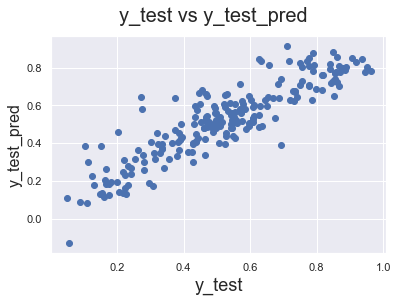

In [64]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_test_pred', fontsize=16)
plt.show()

- r_squared and adjusted r_squared of test and train data set is comparable and hence the model is also good fit for test data set
- y_test_Predicted and y_test have strong linear correlation,so this model is a good estimate for both test and train data. 

## Interpretation about the final result.

#### Characteristics equation :
cnt = 0.126 + (yr × 0.232) - (holiday × 0.099) + (temp × 0.548) − (windspeed × 0.153) + (season2 × 0.086) + (season4 × 0.131) + (mnth9 × 0.101) − (weathersit2 × 0.08) − (weathersit3 × 0.284) .

#### Top 3 influencers for bike sharing :
- 1. temp (temperature) - Temperature has a positive influence for the demand of bikes.Unit increase in temperature with other features held constant causes demand to increases by 0.548. 
- 2. weathersit3 (Snow/rain day) - Snowfall/rainy days have negative influence for the demand of bikes. Unit increase in snowfall/rain with other features held constant causes demand to decreases by 0.284..
- 3. yr (year) - Demand for bikes has increased from 2018 to 2019.The coefficient attribute for year is 0.232.

#### Other influencres for bike sharing demand:
- Positive influencers :season2 (summer),season4(winter),and mnth9 (september) have positive influence to demand of bikes.
- Negative influencers :holiday,windspeed,and weathersit2 (Mist+cloudy weather) have negative influence to demand of bikes.


In summary demand for bikes is more when there is a pleasant temperature and good weather condition.And, good news is demand for service is increasing from year to year.